It is highly recommended to use a powerful **GPU**, you can use it for free uploading this notebook to [Google Colab](https://colab.research.google.com/notebooks/intro.ipynb).
<table align="center">
 <td align="center"><a target="_blank" href="https://colab.research.google.com/github/ezponda/intro_deep_learning/blob/main/class/Fundamentals/Regression_tuner.ipynb">
        <img src="https://colab.research.google.com/img/colab_favicon_256px.png"  width="50" height="50" style="padding-bottom:5px;" />Run in Google Colab</a></td>
  <td align="center"><a target="_blank" href="https://github.com/ezponda/intro_deep_learning/blob/main/class/Fundamentals/Regression_tuner.ipynb">
        <img src="https://github.githubassets.com/images/modules/logos_page/GitHub-Mark.png"  width="50" height="50" style="padding-bottom:5px;" />View Source on GitHub</a></td>
</table>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
tf.keras.utils.set_random_seed(0)

# Abalone Dataset

Abalones are marine snails that can be found along coasts of almost every continent.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/0b/AbaloneInside.jpg/440px-AbaloneInside.jpg" alt="abalone" border="0" width="400" height="500">



In this notebook we are going to Predict the age of abalone from physical measurements. [Link to documentation](https://archive.ics.uci.edu/ml/datasets/abalone).

In [2]:
df_train = pd.read_csv(
    "https://storage.googleapis.com/download.tensorflow.org/data/abalone_train.csv",
    names=["Length", "Diameter", "Height", "Whole weight", "Shucked weight",
           "Viscera weight", "Shell weight", "Age"])
df_train.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,0.435,0.335,0.110,0.334,0.1355,0.0775,0.0965,7
1,0.585,0.450,0.125,0.874,0.3545,0.2075,0.2250,6
2,0.655,0.510,0.160,1.092,0.3960,0.2825,0.3700,14
3,0.545,0.425,0.125,0.768,0.2940,0.1495,0.2600,16
4,0.545,0.420,0.130,0.879,0.3740,0.1695,0.2300,13


In [ ]:
df_train.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
count,3320.000000,3320.000000,3320.000000,3320.000000,3320.000000,3320.000000,3320.000000,3320.000000
mean,0.522693,0.406575,0.139271,0.824734,0.357705,0.180162,0.237921,9.896988
std,0.121164,0.100120,0.042708,0.491182,0.222223,0.110182,0.140261,3.205654
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.345000,0.115000,0.436375,0.181500,0.092000,0.127375,8.000000
50%,0.540000,0.425000,0.140000,0.795250,0.335500,0.170750,0.230000,9.000000
75%,0.615000,0.480000,0.165000,1.150000,0.504500,0.253125,0.325000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,27.000000


In [3]:
y_train = df_train.pop('Age')
X_train = df_train.copy()

In [4]:
df_test = pd.read_csv(
    "https://storage.googleapis.com/download.tensorflow.org/data/abalone_test.csv",
    names=["Length", "Diameter", "Height", "Whole weight", "Shucked weight",
           "Viscera weight", "Shell weight", "Age"])
y_test = df_test.pop('Age')
X_test = df_test.copy()

In [5]:
print(f'X_train shape: {X_train.shape}, X_test shape: {X_test.shape}')

X_train shape: (3320, 7), X_test shape: (850, 7)


## Regression Losses

- **Mean Squared Error (MSE)**:

```python
tf.keras.losses.MSE
```
```python
model.compile(loss='mse') or model.compile(loss=tf.keras.losses.MSE)
```

$$ \mathrm{MSE} = \frac{\sum_{i=1}^n\left( y_i - \hat{y_i}\right)^2}{n}$$


- **Mean Absolute Error (MAE)**:

```python
tf.keras.losses.MAE
```
```python
model.compile(loss='mae') or model.compile(loss=tf.keras.losses.MAE)
```

$$ \mathrm{MAE} = \frac{\sum_{i=1}^n\left| y_i - \hat{y_i}\right|}{n}$$


## Question 1: Create a net with at least 1 hidden layer


1. You can use the [Functional API](https://keras.io/guides/functional_api/):

You need to start with an input data entry:
```python    
    inputs = keras.Input(shape=(...,))
    layer_1 = layers.Dense(...)(inputs)
```

and the network outputs:
```python
outputs = layers.Dense(...)(previous_layer)
model = keras.Model(inputs=inputs, outputs=outputs)
```

2. Or you can use [Sequential API](https://keras.io/guides/sequential_model/)

```python
model = keras.Sequential(name='example_model')
model.add(layers.Dense(..., input_shape=(8,))
model.add(...
```

You can introduce regularization methods seen in [Prevent_Overfitting.ipynb](https://github.com/ezponda/intro_deep_learning/blob/main/class/Fundamentals/Prevent_Overfitting.ipynb) like [Dropout layer](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout):


```python
tf.keras.layers.Dropout(
    rate, noise_shape=None, seed=None, **kwargs
)
```

With Functional API:
```python
next_layer = layers.Dropout(0.4)(prev_layer)
```
With Sequential:
```python
model.add(layers.Dropout(0.4))


In [6]:
model = keras.Sequential()

model.add(layers.Dense(64, input_shape=(7,), activation='relu'))

# output layer
model.add(layers.Dense(1, activation='linear'))

## model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 577 (2.25 KB)

 Trainable params: 577 (2.25 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.MSE,
    metrics=['mae']
)

model.fit(X_train, y_train, epochs=50, validation_split=0.2, batch_size=32)

Epoch 1/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 101.3261 - mae: 9.5935 - val_loss: 75.6884 - val_mae: 8.1784
Epoch 2/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 61.7677 - mae: 7.3447 - val_loss: 30.9343 - val_mae: 4.8747
Epoch 3/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 21.9568 - mae: 3.9234 - val_loss: 10.6273 - val_mae: 2.3471
Epoch 4/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.7137 - mae: 2.0795 - val_loss: 8.4726 - val_mae: 2.1284
Epoch 5/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.7901 - mae: 2.0190 - val_loss: 8.2333 - val_mae: 2.1020
Epoch 6/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.6110 - mae: 1.9995 - val_loss: 8.0160 - val_mae: 2.0701
Epoch 7/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.3968 - mae: 1.9649 - val_loss: 7.8020 - val_mae: 2.0387
Epoch 8/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.1892 - mae: 1.9315 - val_loss: 7.5918 - val_mae: 2.0100
Epoch 9/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.9736 

In [8]:
results = model.evaluate(X_test, y_test, verbose=1)
print('Test Loss: {}'.format(results[0]))

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.0121 - mae: 1.7485 
Test Loss: 5.493348598480225


In [9]:
# Using the Functional API
# 1. Define the input layer
inputs = keras.Input(shape=(7,))

# 2. Build the hidden layers, You can also add dropout or other layer types
x = layers.Dense(64, activation='relu')(inputs)

x = layers.Dropout(0.4)(x)


# 3. Define the output layer
outputs = layers.Dense(1, activation='linear')(x)

# 4. Create the model by specifying inputs and outputs
model = keras.Model(inputs=inputs, outputs=outputs, name='functional_model')

# Model summary
model.summary()

Model: "functional_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 7)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 577 (2.25 KB)

 Trainable params: 577 (2.25 KB)

 Non-trainable params: 0 (0.00 B)

[Early stopping callback](https://keras.io/api/callbacks/early_stopping/)

In [10]:
# Early stopping callback
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    min_delta=0.001,
    restore_best_weights= True,
    verbose=1
)

In [11]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.MSE,
    metrics=['mae'],
)
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    validation_split=0.2,
    batch_size=32,
    callbacks=[early_stopping]  # early stopping
    )

Epoch 1/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 94.2747 - mae: 9.2374 - val_loss: 57.7777 - val_mae: 7.0591
Epoch 2/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 42.5110 - mae: 5.8959 - val_loss: 14.9926 - val_mae: 2.9364
Epoch 3/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12.0037 - mae: 2.5779 - val_loss: 8.7838 - val_mae: 2.1670
Epoch 4/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.9499 - mae: 2.3250 - val_loss: 8.3915 - val_mae: 2.1128
Epoch 5/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 9.8480 - mae: 2.3317 - val_loss: 8.0768 - val_mae: 2.0563
Epoch 6/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 9.4688 - mae: 2.2447 - val_loss: 7.7638 - val_mae: 2.0098
Epoch 7/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 9.2436 - mae: 2.2118 - val_loss: 7.5543 - val_mae: 1.9610
Epoch 8/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 9.1594 - mae: 2.1894 - val_loss: 7.2919 - val_mae: 1.9438
Epoch 9/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.9191 - 

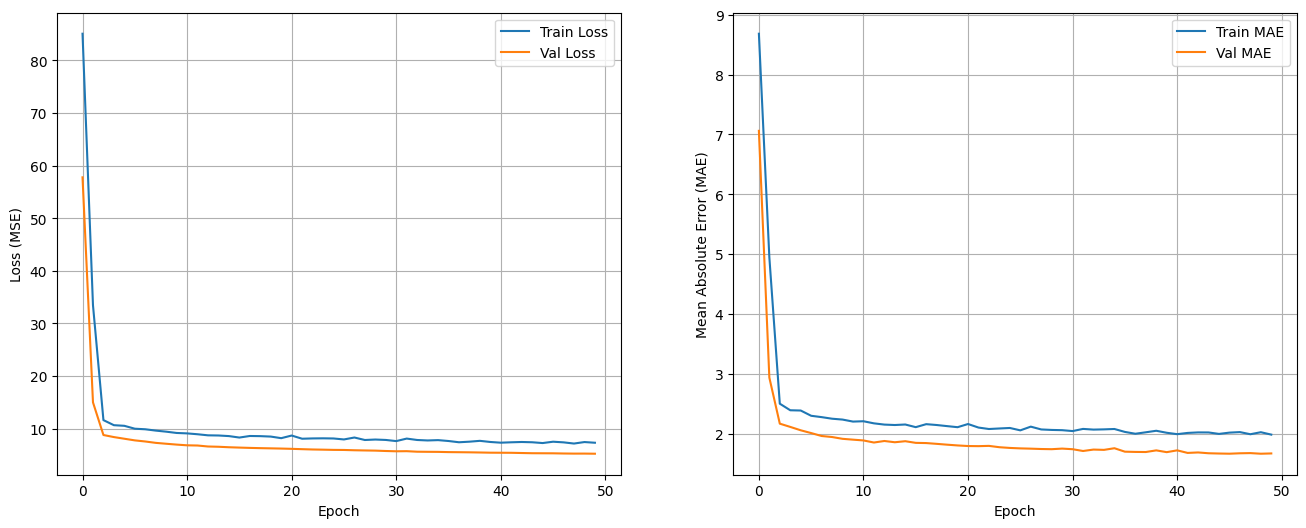

In [12]:
import pandas as pd
from matplotlib import pyplot as plt

def show_loss_accuracy_evolution(history):
    """
    Plots the training and validation loss and mean absolute error over epochs.

    Args:
        history: A Keras History object returned by model.fit.
    """
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    # Plot Loss
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss (MSE)') # Assuming MSE was used for loss
    ax1.plot(hist['epoch'], hist['loss'], label='Train Loss')
    ax1.plot(hist['epoch'], hist['val_loss'], label = 'Val Loss')
    ax1.grid()
    ax1.legend()

    # Plot Mean Absolute Error
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Mean Absolute Error (MAE)') # Plotting MAE instead of Accuracy
    ax2.plot(hist['epoch'], hist['mae'], label='Train MAE')
    ax2.plot(hist['epoch'], hist['val_mae'], label = 'Val MAE')
    ax2.grid()
    ax2.legend()

    plt.show()

show_loss_accuracy_evolution(history)

In [13]:
results = model.evaluate(X_test, y_test, verbose=1)
print('Test Loss: {}'.format(results[0]))

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.3414 - mae: 1.7513 
Test Loss: 5.824174880981445


## Question 2: Normalize the inputs and train the same model

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)
print('X_train mu, sigma', X_train_norm.mean(0), X_train_norm.std(0))
print('X_test mu, sigma', X_test_norm.mean(0), X_test_norm.std(0))

X_train mu, sigma [ 2.77689518e-16  4.65491099e-17  2.50402109e-16 -2.81434849e-16
  2.18299274e-16  1.77100637e-16 -1.05404306e-16] [1. 1. 1. 1. 1. 1. 1.]
X_test mu, sigma [0.05808422 0.06917445 0.03098307 0.04461505 0.04160742 0.02421514
 0.03516632] [0.95187926 0.95135017 0.89294094 0.99223632 0.99454932 0.97495047
 0.96304109]


In [15]:
model = keras.Sequential()
model.add(layers.Dense(64, input_shape=(7,), activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(1, activation='linear'))

## model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 577 (2.25 KB)

 Trainable params: 577 (2.25 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Early stopping callback
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
    verbose=1
)

In [17]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.MSE,
    metrics=['mae']
)

model.fit(
    X_train_norm,
    y_train,
    epochs=50,
    validation_split=0.2,
    batch_size=32,
    callbacks=early_stopping,  # early stoppings
    )

Epoch 1/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 98.4600 - mae: 9.4138 - val_loss: 65.9324 - val_mae: 7.3193
Epoch 2/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 56.8528 - mae: 6.6811 - val_loss: 37.7951 - val_mae: 5.1408
Epoch 3/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 35.8629 - mae: 4.9969 - val_loss: 27.9973 - val_mae: 4.3643
Epoch 4/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 28.9119 - mae: 4.4001 - val_loss: 21.6723 - val_mae: 3.7771
Epoch 5/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 22.5055 - mae: 3.7436 - val_loss: 15.0371 - val_mae: 3.0158
Epoch 6/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 16.1256 - mae: 3.0509 - val_loss: 10.1090 - val_mae: 2.3094
Epoch 7/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.4631 - mae: 2.4812 - val_loss: 7.4479 - val_mae: 1.9260
Epoch 8/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.5318 - mae: 2.2886 - val_loss: 6.7030 - val_mae: 1.8336
Epoch 9/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8

In [18]:
results = model.evaluate(X_test_norm, y_test, verbose=1)
print('Test Loss: {}'.format(results[0]))

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.9727 - mae: 1.6822
Test Loss: 5.478509426116943


## Optimizers:

- [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD): Gradient descent with momentum
```python
tf.keras.optimizers.SGD(
    learning_rate=0.01, momentum=0.0, nesterov=False, name='SGD', **kwargs
)
```
If momentum is 0:
```python
w = w - learning_rate * gradient
```
If we have momentum:

 ```python
velocity = momentum * velocity - learning_rate * g
w = w + velocity
```


- [RMSprop](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/RMSprop): Root Mean Square Propagation
```python
tf.keras.optimizers.RMSprop(
    learning_rate=0.001, rho=0.9, momentum=0.0, epsilon=1e-07, centered=False,
    name='RMSprop', **kwargs
)
```
- [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam): Adaptive Moment Estimation,  is an update to the RMSProp algorithm
```python
tf.keras.optimizers.Adam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam', **kwargs
)
```

```python
model.compile(loss='mse', optimizer='adam')
model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))
```

## Question 3: Train the same model with different optimizers

In [ ]:
model = keras.Sequential()
...
## model summary
model.summary()

In [ ]:
model.compile(
    optimizer=...,
    loss=...,
    metrics=[...]
)
model.fit(X_train_norm, y_train, epochs=50, validation_split=0.2, batch_size=32)

In [ ]:
results = model.evaluate(X_test_norm, y_test, verbose=1)
print('Test Loss: {}'.format(results[0]))

# Keras Tuner : Introduction to Hyperparameter Optimization

The [Keras Tuner](https://www.tensorflow.org/tutorials/keras/keras_tuner) is a library for hyper-parameter tuning.

## What is Hyperparameter Tuning?

Hyperparameter tuning is the process of finding the optimal set of hyperparameters for a machine learning model to maximize its performance. Unlike model parameters (weights and biases) that are learned during training, hyperparameters are set before the learning process begins and influence how the model learns.

Common hyperparameters include:
- **Model architecture**: number of layers, units per layer
- **Training parameters**: learning rate, batch size, dropout rate
- **Regularization**: L1/L2 penalties, early stopping criteria

Manual tuning of these parameters can be time-consuming and often leads to suboptimal results. Keras Tuner provides an automated approach to efficiently search the hyperparameter space.

## Understanding Different Tuning Strategies

Keras Tuner offers four main strategies for hyperparameter optimization:

### 1. RandomSearch
- **How it works**: Randomly samples from the hyperparameter space
- **Pros**: Simple, easily parallelizable, no assumptions about parameter importance
- **Cons**: Can be inefficient for large search spaces
- **Best for**: Initial exploration or when little is known about the hyperparameter landscape

### 2. Hyperband
- **How it works**: Allocates resources (epochs) dynamically, quickly discarding poor performers
- **Pros**: More efficient than random search, especially for deep networks
- **Cons**: More complex to configure correctly
- **Best for**: When training is computationally expensive and you want to balance exploration vs. exploitation

### 3. BayesianOptimization
- **How it works**: Builds a probability model of the objective function and uses it to select hyperparameters
- **Pros**: More efficient use of resources, learns from previous evaluations
- **Cons**: More complex, computationally intensive for each iteration
- **Best for**: When evaluation is expensive and you have a moderate search space

### 4. Sklearn
- **How it works**: Interface to scikit-learn's hyperparameter search methods
- **Pros**: Familiar API for those coming from scikit-learn
- **Cons**: Limited to sklearn's hyperparameter tuning capabilities
- **Best for**: When integrating with existing sklearn pipelines


In [20]:
pip install -U keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.3 MB/s eta 0:00:00


In [21]:
import kerastuner as kt

<ipython-input-21-5fd8096cdee5>:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


Hyperparameters are of two types:
1. **Model hyperparameters** like number of units, type of activation or number hidden layers.
2. **Algorithm hyperparameters** like the learning rate in adam.

The model-building function takes an argument `hp` from which you can sample hyper-parameters.

```python
def build_model(hp):
    ...
    return model

```

- `hp.Int` to sample an integer from a certain range:
```python
hp.Int('units', min_value=32, max_value=256, step=32, default=64)
```
- `hp.Float` to sample a float number from a certain range:
```python
hp.Float('dropout', min_value=0.0, max_value=0.1, default=0.005, step=0.05)
```
- `hp.Choice` to select values in a list:
```python
hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])
```
- [list of hyperparameter methods](https://keras-team.github.io/keras-tuner/documentation/hyperparameters/)

In [22]:
def build_model(hp):
    model = keras.Sequential()
    # Sample different number of layers with hp.Int
    for i in range(hp.Int('num_layers', 1, 3)):
        # Sample different number of layers with hp.Int
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=64,
                                            max_value=128,
                                            step=32), #indica los intervalos en los que ira probando del min_value al max_value
                               activation='relu'))
    # Sample different activation functions with hp.Choice
    model.add(layers.Dense(1, activation=hp.Choice('output_activation', ['relu', 'linear'])))

    # Sample different activation functions with hp.Choice
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mse',
        metrics=['mae'])
    return model

The Keras Tuner has four [tuners](https://keras-team.github.io/keras-tuner/documentation/tuners/) available  `RandomSearch`, `Hyperband`, `BayesianOptimization`, and `Sklearn`


In [23]:
tuner = kt.Hyperband(build_model,
                     objective='val_loss',
                     max_epochs=15,
                     factor=2,
                     hyperband_iterations=1,
                     directory='my_dir',
                     project_name='intro_to_kt')
'''

tuner = kt.RandomSearch(build_model,
                     objective='val_loss',
                     max_trials=20,
                     directory='my_dir',
                     project_name='intro_to_kt')
'''

stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [24]:
tuner.search(X_train, y_train, epochs=30, validation_split=0.15, batch_size=32, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]
print(best_hps.get_config())

Trial 46 Complete [00h 00m 12s]
val_loss: 13.979697227478027

Best val_loss So Far: 4.998258590698242
Total elapsed time: 00h 04m 12s
{'space': [{'class_name': 'Int', 'config': {'name': 'num_layers', 'default': None, 'conditions': [], 'min_value': 1, 'max_value': 3, 'step': 1, 'sampling': 'linear'}}, {'class_name': 'Int', 'config': {'name': 'units_0', 'default': None, 'conditions': [], 'min_value': 64, 'max_value': 128, 'step': 32, 'sampling': 'linear'}}, {'class_name': 'Choice', 'config': {'name': 'output_activation', 'default': 'relu', 'conditions': [], 'values': ['relu', 'linear'], 'ordered': False}}, {'class_name': 'Choice', 'config': {'name': 'learning_rate', 'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}}, {'class_name': 'Int', 'config': {'name': 'units_1', 'default': None, 'conditions': [], 'min_value': 64, 'max_value': 128, 'step': 32, 'sampling': 'linear'}}, {'class_name': 'Int', 'config': {'name': 'units_2', 'default': None, 'conditions':

In [25]:
tuner.results_summary()

Results summary
Results in my_dir/intro_to_kt
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 0018 summary
Hyperparameters:
num_layers: 3
units_0: 96
output_activation: relu
learning_rate: 0.001
units_1: 64
units_2: 64
tuner/epochs: 15
tuner/initial_epoch: 8
tuner/bracket: 3
tuner/round: 3
tuner/trial_id: 0015
Score: 4.998258590698242

Trial 0038 summary
Hyperparameters:
num_layers: 3
units_0: 64
output_activation: linear
learning_rate: 0.001
units_1: 128
units_2: 64
tuner/epochs: 15
tuner/initial_epoch: 8
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0037
Score: 5.13273811340332

Trial 0032 summary
Hyperparameters:
num_layers: 2
units_0: 96
output_activation: relu
learning_rate: 0.001
units_1: 64
units_2: 96
tuner/epochs: 15
tuner/initial_epoch: 8
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0027
Score: 5.141265392303467

Trial 0019 summary
Hyperparameters:
num_layers: 2
units_0: 96
output_activation: linear
learning_rate: 0.001
units_1: 96
units_2: 64
t

In [27]:
print(f"Best learning rate: {best_hps.get('learning_rate')}")
print(f"Best output activation function: {best_hps.get('output_activation')}")
print(f"Best number of hidden layers: {best_hps.get('num_layers')}")
for i in range(best_hps.get('num_layers')):
    print(f"Number of units of hidden layer {i+1}: {best_hps.get('units_' + str(i))}")

Best learning rate: 0.001
Best output activation function: relu
Best number of hidden layers: 3
Number of units of hidden layer 1: 96
Number of units of hidden layer 2: 64
Number of units of hidden layer 3: 64


### Hyperparameter Importance

Extracting hyperparameter data from tuner...
Analyzed 46 trials

Top 10 configurations:

Rank 1 (Score: 4.9983):
  learning_rate: 0.001
  num_layers: 3
  output_activation: relu
  tuner/bracket: 3
  tuner/epochs: 15
  tuner/initial_epoch: 8
  tuner/round: 3
  tuner/trial_id: 0015
  units_0: 96
  units_1: 64
  units_2: 64

Rank 2 (Score: 5.1327):
  learning_rate: 0.001
  num_layers: 3
  output_activation: linear
  tuner/bracket: 1
  tuner/epochs: 15
  tuner/initial_epoch: 8
  tuner/round: 1
  tuner/trial_id: 0037
  units_0: 64
  units_1: 128
  units_2: 64

Rank 3 (Score: 5.1413):
  learning_rate: 0.001
  num_layers: 2
  output_activation: relu
  tuner/bracket: 2
  tuner/epochs: 15
  tuner/initial_epoch: 8
  tuner/round: 2
  tuner/trial_id: 0027
  units_0: 96
  units_1: 64
  units_2: 96

Rank 4 (Score: 5.1956):
  learning_rate: 0.001
  num_layers: 2
  output_activation: linear
  tuner/bracket: 3
  tuner/epochs: 15
  tuner/initial_epoch: 8
  tuner/round: 3
  tuner/trial_id: 0017
  units_0

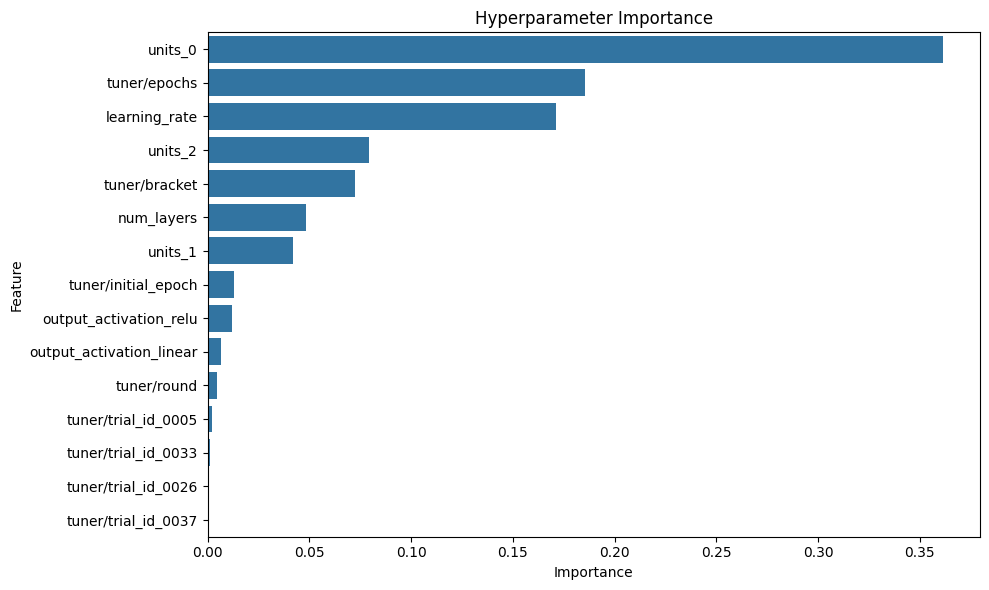


Hyperparameter importance ranking:
1. units_0: 0.3615
2. tuner/epochs: 0.1855
3. learning_rate: 0.1710
4. units_2: 0.0794
5. tuner/bracket: 0.0727
6. num_layers: 0.0483
7. units_1: 0.0420
8. tuner/initial_epoch: 0.0127
9. output_activation_relu: 0.0118
10. output_activation_linear: 0.0066
11. tuner/round: 0.0045
12. tuner/trial_id_0005: 0.0023
13. tuner/trial_id_0033: 0.0011
14. tuner/trial_id_0026: 0.0004
15. tuner/trial_id_0037: 0.0001


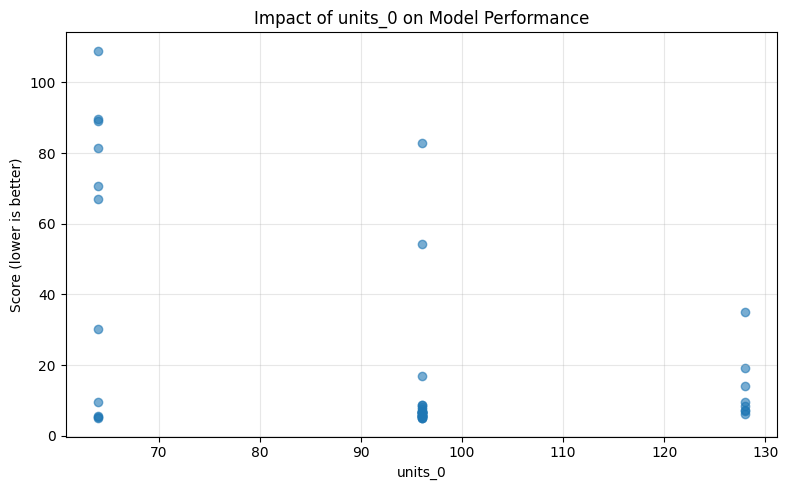


Analysis complete. Use these insights to refine your hyperparameter search!


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns

def analyze_hyperparameter_importance(tuner, top_n=10):
    """
    Analyze the importance of different hyperparameters using Random Forest.

    Parameters:
    -----------
    tuner : keras_tuner.Tuner
        The tuner object after running a hyperparameter search
    top_n : int, default=10
        Number of top trials to print

    Returns:
    --------
    importance_df : pandas.DataFrame
        DataFrame containing the importance of each hyperparameter
    """
    print("Extracting hyperparameter data from tuner...")

    # Extract hyperparameters and scores from tuner
    hp_results = []

    for trial_id, trial in tuner.oracle.trials.items():
        if trial.score is not None:  # Only include completed trials
            # Get hyperparameters
            hp_values = trial.hyperparameters.values
            # Add score (lower is better for loss)
            hp_values['score'] = trial.score
            hp_results.append(hp_values)

    # Convert to DataFrame
    results_df = pd.DataFrame(hp_results)

    # Show basic stats
    print(f"Analyzed {len(results_df)} trials")
    print("\nTop {top_n} configurations:".format(top_n=top_n))
    top_configs = results_df.sort_values('score').head(top_n)
    for i, (_, config) in enumerate(top_configs.iterrows()):
        print(f"\nRank {i+1} (Score: {config['score']:.4f}):")
        for param, value in sorted(config.items()):
            if param != 'score':
                print(f"  {param}: {value}")

    # Prepare data for Random Forest
    X = results_df.drop('score', axis=1)

    # Convert non-numeric columns to numeric
    for col in X.columns:
        if X[col].dtype == 'object':
            # Create dummies for categorical variables
            dummies = pd.get_dummies(X[col], prefix=col)
            X = pd.concat([X.drop(col, axis=1), dummies], axis=1)

    y = results_df['score']

    # Train Random Forest for feature importance
    print("\nTraining Random Forest to analyze hyperparameter importance...")
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X, y)

    # Get feature importance
    importance = rf.feature_importances_

    # Create DataFrame of features and importance
    importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': importance
    }).sort_values('Importance', ascending=False)

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=importance_df.head(15))
    plt.title('Hyperparameter Importance')
    plt.tight_layout()
    plt.show()

    # Print importance values
    print("\nHyperparameter importance ranking:")
    for i, (_, row) in enumerate(importance_df.iterrows()):
        if i < 15:  # Print top 15
            print(f"{i+1}. {row['Feature']}: {row['Importance']:.4f}")

    # Analyze top feature's impact with partial dependence plot
    top_feature = importance_df.iloc[0]['Feature']
    if top_feature in X.columns:  # Ensure it's a numeric feature
        plt.figure(figsize=(8, 5))
        plt.scatter(X[top_feature], y, alpha=0.6)
        plt.title(f'Impact of {top_feature} on Model Performance')
        plt.xlabel(top_feature)
        plt.ylabel('Score (lower is better)')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

    print("\nAnalysis complete. Use these insights to refine your hyperparameter search!")

    return importance_df



# After running tuner.search():

# 1. Get overall importance
importance_df = analyze_hyperparameter_importance(tuner)




## Train the model

In [29]:
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, y_train, epochs=50, validation_split=0.15, callbacks=[stop_early])

Epoch 1/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 65.7041 - mae: 6.9685 - val_loss: 8.2875 - val_mae: 2.1270
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 7.4416 - mae: 1.9774 - val_loss: 7.0021 - val_mae: 1.9376
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 6.5527 - mae: 1.8596 - val_loss: 6.5196 - val_mae: 1.8731
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 6.0971 - mae: 1.7992 - val_loss: 6.1480 - val_mae: 1.8069
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.6675 - mae: 1.7311 - val_loss: 5.8024 - val_mae: 1.7445
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.2970 - mae: 1.6750 - val_loss: 5.5939 - val_mae: 1.6803
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.0418 - mae: 1.6342 - val_loss: 5.4877 - val_mae: 1.6448
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.8909 - mae: 1.6109 - val_loss: 5.4437 - val_mae: 1.6277
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.7971 - mae:

In [30]:
results = model.evaluate(X_test_norm, y_test, verbose=1)
print('Test Loss: {}'.format(results[0]))

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 35.4653 - mae: 5.1809 
Test Loss: 33.62784194946289


## Question 4: Try to search with dropout

In [31]:
def build_model(hp):
    """Build a model with tunable architecture and dropout regularization."""
    model = keras.Sequential()

    # Tune the number of layers (try 1-4 layers)
    for i in range(hp.Int('num_layers', 1, 4)):
        # Tune the number of units in each layer
        model.add(layers.Dense(
            units=hp.Int(f'units_' + str(i),
                         min_value=64,
                         max_value=192,
                         step=64),
            activation='relu'))
        # Add dropout after the dense layer
        # Hint: Experiment with different dropout ranges
        model.add(layers.Dropout(hp.Float('dp_' + str(i),
                                          min_value=0.15,
                                          max_value=0.5,
                                          step=0.05)))

    model.add(layers.Dense(1, activation=hp.Choice(
        'output_activation', ['relu', 'linear'])))
    '''
    # Output layer for regression)
    model.add(layers.Dense(1, activation=...))

    # Tune the optimizer and learning rate
    # Hint: Try different optimizers and log-scale for learning rate
    optimizer_choice = hp.Choice('optimizer', values=[...])
    learning_rate = hp.Float('learning_rate', min_value=..., max_value=..., sampling=...)

    if optimizer_choice == 'adam':
        optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer_choice == 'rmsprop':
        optimizer = keras.optimizers.RMSprop(learning_rate=learning_rate)
    else:
        optimizer = ...
    '''

    # Compile the model
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mse',
        metrics=['mae']
    )

    return model

In [32]:
tuner = kt.Hyperband(build_model,
                     objective='val_loss',
                     max_epochs=40,
                     factor=3,
                     hyperband_iterations=2,
                     directory='my_dir_2',
                     project_name='intro_to_kt')

stop_early = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    )
tuner.search(X_train, y_train, epochs=30, validation_split=0.15,
             batch_size=32, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(best_hps.get_config())

Trial 180 Complete [00h 00m 25s]
val_loss: 7.553315162658691

Best val_loss So Far: 4.797913074493408
Total elapsed time: 00h 24m 14s
{'space': [{'class_name': 'Int', 'config': {'name': 'num_layers', 'default': None, 'conditions': [], 'min_value': 1, 'max_value': 4, 'step': 1, 'sampling': 'linear'}}, {'class_name': 'Int', 'config': {'name': 'units_0', 'default': None, 'conditions': [], 'min_value': 64, 'max_value': 192, 'step': 64, 'sampling': 'linear'}}, {'class_name': 'Float', 'config': {'name': 'dp_0', 'default': 0.15, 'conditions': [], 'min_value': 0.15, 'max_value': 0.5, 'step': 0.05, 'sampling': 'linear'}}, {'class_name': 'Choice', 'config': {'name': 'output_activation', 'default': 'relu', 'conditions': [], 'values': ['relu', 'linear'], 'ordered': False}}, {'class_name': 'Choice', 'config': {'name': 'learning_rate', 'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}}, {'class_name': 'Int', 'config': {'name': 'units_1', 'default': None, 'condition

In [34]:
print(f"Best learning rate: {best_hps.get('learning_rate')}")
print(f"Best output activation function: {best_hps.get('output_activation')}")
print(f"Best number of hidden layers: {best_hps.get('num_layers')}")
for i in range(best_hps.get('num_layers')):
    print(f"Number of units of hidden layer {i+1}: {best_hps.get('units_' + str(i))}")
    print(f"Dropout rate of hidden layer {i+1}: {best_hps.get('dp_' + str(i))}")

Best learning rate: 0.001
Best output activation function: relu
Best number of hidden layers: 2
Number of units of hidden layer 1: 128
Dropout rate of hidden layer 1: 0.2
Number of units of hidden layer 2: 192
Dropout rate of hidden layer 2: 0.15


In [35]:
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train_norm, y_train, epochs=50, validation_split=0.15, callbacks=[stop_early])

Epoch 1/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 62.8845 - mae: 6.8236 - val_loss: 13.1423 - val_mae: 2.6817
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.4877 - mae: 2.3376 - val_loss: 7.5118 - val_mae: 1.9340
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.5551 - mae: 1.9628 - val_loss: 6.4172 - val_mae: 1.7833
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.4224 - mae: 1.8276 - val_loss: 5.8946 - val_mae: 1.7026
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.9911 - mae: 1.7879 - val_loss: 5.4838 - val_mae: 1.6505
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.5317 - mae: 1.7296 - val_loss: 5.2595 - val_mae: 1.6225
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.3691 - mae: 1.7266 - val_loss: 5.1020 - val_mae: 1.5926
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.2957 - mae: 1.6896 - val_loss: 5.0176 - val_mae: 1.5800
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.2714 - ma

In [36]:
results = model.evaluate(X_test_norm, y_test, verbose=1)
print('Test Loss: {}'.format(results[0]))

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.5632 - mae: 1.5929 
Test Loss: 5.052547454833984
